In [1]:
import pandas as pd
import datetime as dt
from geopy.distance import distance
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar
import glob
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
tripdata = pd.concat([pd.read_csv(f) for f in glob.glob('/content/drive/MyDrive/tripdata/*.csv')], ignore_index = True)

In [4]:
tripdata.shape

(6290023, 16)

In [5]:
tripdata.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,postal code
0,388,2018-01-01 00:16:33,2018-01-01 00:23:01,178,MIT Pacific St at Purrington St,42.359573,-71.101295,107,Ames St at Main St,42.362500,-71.088220,643,Subscriber,1992.0,2.0,NaN
1,265,2018-01-01 00:42:00,2018-01-01 00:46:25,78,Union Square - Somerville,42.379807,-71.093870,225,Cambridge Dept. of Public Works -147 Hampshire...,42.371197,-71.097599,1581,Subscriber,1990.0,1.0,NaN
2,1167,2018-01-01 00:42:44,2018-01-01 01:02:11,16,Back Bay T Stop - Dartmouth St at Stuart St,42.348074,-71.076570,76,Central Sq Post Office / Cambridge City Hall a...,42.366426,-71.105495,173,Subscriber,1990.0,1.0,NaN
3,855,2018-01-01 00:56:50,2018-01-01 01:11:06,69,Coolidge Corner - Beacon St @ Centre St,42.341598,-71.123338,177,University Park,42.362648,-71.100061,1772,Subscriber,1992.0,1.0,NaN
4,487,2018-01-01 01:07:54,2018-01-01 01:16:02,4,Tremont St at E Berkeley St,42.345392,-71.069616,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,1183,Subscriber,1993.0,1.0,NaN


In [27]:
tripdata['starttime'] = pd.to_datetime(tripdata['starttime'])

In [28]:
tripdata['stoptime'] = pd.to_datetime(tripdata['stoptime'])

In [29]:
#Note: will add long/lat back in with station information data
tripdata = tripdata.drop(['start station id', 'end station id', 'start station latitude', 'start station longitude', 'end station latitude', 'end station longitude', 'bikeid', 'postal code'], axis=1)

In [30]:
#TRIP DURATION
#set trip duration units to mintues
tripdata.tripduration = tripdata.tripduration / 60

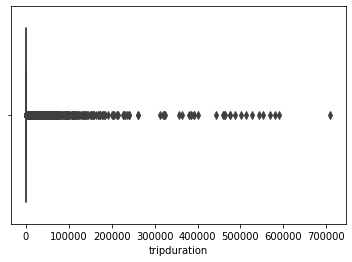

In [31]:
sns.boxplot(x=tripdata['tripduration'])

In [32]:
#trips less than 2 hrs
trip_2hrs = tripdata[tripdata.tripduration <= 120]

In [33]:
trip_2hrs['tripduration'].mode()

0    6.55
dtype: float64

In [34]:
trip_2hrs.shape

(6234440, 8)

In [35]:
tripdata = trip_2hrs
tripdata['tripduration'].max()

120.0

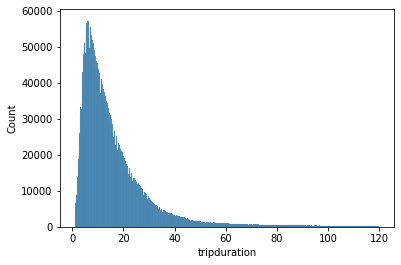

In [15]:
sns.histplot(tripdata['tripduration'])

In [16]:
#USERTYPE
tripdata['usertype'].value_counts()

Subscriber    4855526
Customer      1378914
Name: usertype, dtype: int64

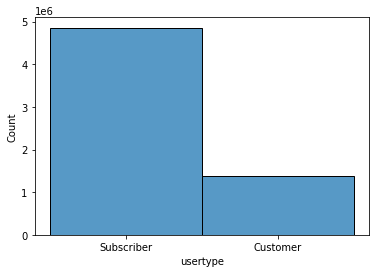

In [17]:
sns.histplot(tripdata['usertype'])

In [36]:
#GENDER
tripdata['gender'] = tripdata['gender'].replace(np.nan, 0)

In [37]:
#Note: 0=unknown, 1=male, 2=female
tripdata['gender'].value_counts()

1.0    3075300
0.0    2079017
2.0    1080123
Name: gender, dtype: int64

In [38]:
tripdata['gender'] = tripdata['gender'].astype(str)

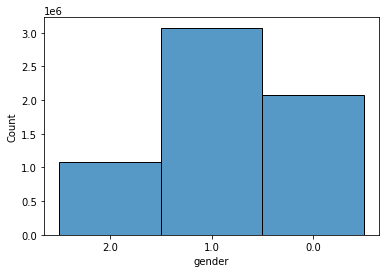

In [39]:
sns.histplot(tripdata['gender'], bins=3)

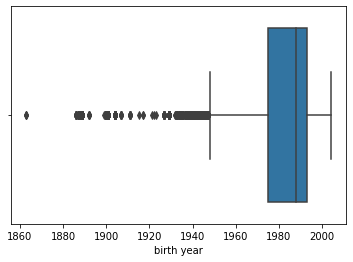

In [40]:
#BIRTH YEAR
sns.boxplot(x=tripdata['birth year'])

In [41]:
#all birth years less than 1920 must be errors
tripdata.drop(tripdata[tripdata['birth year'] < 1920].index, inplace = True) 
tripdata['birth year'].min()

1921.0

In [42]:
#make generation col
tripdata['generation'] = pd.cut(tripdata['birth year'], bins=[1920, 1945, 1964, 1980, 1996, 2012], labels = ['Silent Generation', 'Baby Boomers', 'Gen X', 'Millennials', 'Gen Z'])

In [43]:
tripdata['generation'].value_counts()

Millennials          2803715
Gen X                1166392
Gen Z                 402178
Baby Boomers          283941
Silent Generation       5630
Name: generation, dtype: int64

In [ ]:
tripdata['generation'] = tripdata['generation'].astype(str)

In [ ]:
tripdata['generation'] = tripdata['generation'].replace('nan', 'Unknown')

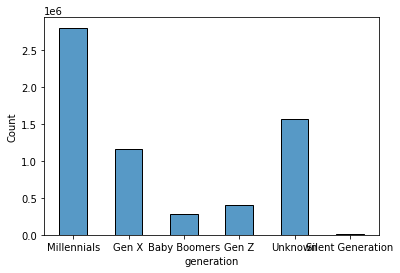

In [ ]:
sns.histplot(tripdata['generation'], shrink=.5)

In [44]:
#DAY OF WEEK
tripdata['start day of week'] = pd.DatetimeIndex(tripdata['starttime']).day_name()
tripdata['end day of week'] = pd.DatetimeIndex(tripdata['stoptime']).day_name()

In [45]:
tripdata['start day of week'].value_counts()

Friday       951804
Wednesday    951470
Thursday     936918
Tuesday      916033
Monday       881911
Saturday     847118
Sunday       747951
Name: start day of week, dtype: int64

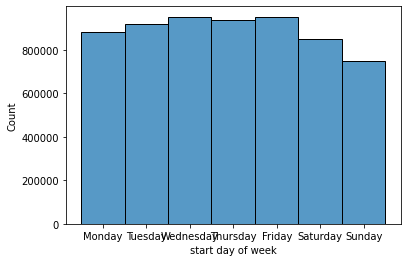

In [51]:
sns.histplot(tripdata['start day of week'], bins=7)

In [ ]:
tripdata['start date'] = tripdata['starttime'].dt.date

In [ ]:
tripdata['end date'] = tripdata['stoptime'].dt.date

In [ ]:
tripdata.head()

,tripduration,starttime,stoptime,start station name,end station name,usertype,birth year,gender,generation,start day of week,end day of week,start date,end date
0,6.466667,2018-01-01 00:16:33,2018-01-01 00:23:01,MIT Pacific St at Purrington St,Ames St at Main St,Subscriber,1992.0,2.0,Millennials,Monday,Monday,2018-01-01,2018-01-01
1,4.416667,2018-01-01 00:42:00,2018-01-01 00:46:25,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,Subscriber,1990.0,1.0,Millennials,Monday,Monday,2018-01-01,2018-01-01
2,19.450000,2018-01-01 00:42:44,2018-01-01 01:02:11,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,Subscriber,1990.0,1.0,Millennials,Monday,Monday,2018-01-01,2018-01-01
3,14.250000,2018-01-01 00:56:50,2018-01-01 01:11:06,Coolidge Corner - Beacon St @ Centre St,University Park,Subscriber,1992.0,1.0,Millennials,Monday,Monday,2018-01-01,2018-01-01
4,8.116667,2018-01-01 01:07:54,2018-01-01 01:16:02,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,Subscriber,1993.0,1.0,Millennials,Monday,Monday,2018-01-01,2018-01-01


In [ ]:
tripdata.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station name',
       'end station name', 'usertype', 'birth year', 'gender', 'generation',
       'start day of week', 'end day of week', 'start date', 'end date'],
      dtype='object')

In [ ]:
#add station information
station_info = pd.read_csv('current_bluebikes_stations.csv', skiprows=1)

In [ ]:
station_info.head()

,Number,Name,Latitude,Longitude,District,Public,Total docks
0,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18
1,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19
2,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,NaN,Yes,17
3,S32023,30 Dane St,42.381001,-71.104025,Somerville,Yes,15
4,M32026,359 Broadway - Broadway at Fayette Street,42.370803,-71.104412,Cambridge,Yes,23


In [ ]:
#There is only one element missing here and we happen to know the District is Boston
station_info['District'].fillna(value='Boston', inplace=True)

In [ ]:
station_info.isnull().sum()

Number         0
Name           0
Latitude       0
Longitude      0
District       0
Public         0
Total docks    0
dtype: int64

In [ ]:
#start the aggregation process

In [ ]:
#NET BIKES END OF DAY
#start station
tripdata1 = tripdata[['start date', 'start station name']]

In [ ]:
tripdata1.head()

,start date,start station name
0,2018-01-01,MIT Pacific St at Purrington St
1,2018-01-01,Union Square - Somerville
2,2018-01-01,Back Bay T Stop - Dartmouth St at Stuart St
3,2018-01-01,Coolidge Corner - Beacon St @ Centre St
4,2018-01-01,Tremont St at E Berkeley St


In [ ]:
tripdata1agg = tripdata1.groupby(by=['start date', 'start station name'], as_index=True).size().reset_index(name='start counts')

In [ ]:
tripdata1agg

,start date,start station name,start counts
0,2018-01-01,Ames St at Main St,4
1,2018-01-01,Aquarium T Stop - 200 Atlantic Ave,1
2,2018-01-01,Arch St at Franklin St,3
3,2018-01-01,Back Bay T Stop - Dartmouth St at Stuart St,5
4,2018-01-01,Binney St / Sixth St,1
...,...,...,...
258953,2020-11-30,Watermark Seaport - Boston Wharf Rd at Seaport...,7
258954,2020-11-30,Wentworth Institute of Technology - Huntington...,5
258955,2020-11-30,Whittier St Health Center,7
258956,2020-11-30,Williams St at Washington St,5


In [ ]:
#same for end station
tripdata2 = tripdata[['end date', 'end station name']]

In [ ]:
tripdata2agg = tripdata2.groupby(by=['end date', 'end station name'], as_index=True).size().reset_index(name='end counts')

In [ ]:
tripdata2agg

,end date,end station name,end counts
0,2018-01-01,Alewife Station at Russell Field,1
1,2018-01-01,Ames St at Main St,4
2,2018-01-01,Aquarium T Stop - 200 Atlantic Ave,1
3,2018-01-01,Arch St at Franklin St,1
4,2018-01-01,Back Bay T Stop - Dartmouth St at Stuart St,5
...,...,...,...
258651,2020-11-30,Wentworth Institute of Technology - Huntington...,5
258652,2020-11-30,Whittier St Health Center,4
258653,2020-11-30,Williams St at Washington St,4
258654,2020-11-30,Wilson Square,3


In [ ]:
tripdata1_2 = tripdata1agg.merge(tripdata2agg, how='inner', left_on=['start date', 'start station name'], right_on =['end date', 'end station name'])

In [ ]:
tripdata1_2

,start date,start station name,start counts,end date,end station name,end counts
0,2018-01-01,Ames St at Main St,4,2018-01-01,Ames St at Main St,4
1,2018-01-01,Aquarium T Stop - 200 Atlantic Ave,1,2018-01-01,Aquarium T Stop - 200 Atlantic Ave,1
2,2018-01-01,Arch St at Franklin St,3,2018-01-01,Arch St at Franklin St,1
3,2018-01-01,Back Bay T Stop - Dartmouth St at Stuart St,5,2018-01-01,Back Bay T Stop - Dartmouth St at Stuart St,5
4,2018-01-01,Boston City Hall - 28 State St,3,2018-01-01,Boston City Hall - 28 State St,4
...,...,...,...,...,...,...
251678,2020-11-30,Watermark Seaport - Boston Wharf Rd at Seaport...,7,2020-11-30,Watermark Seaport - Boston Wharf Rd at Seaport...,10
251679,2020-11-30,Wentworth Institute of Technology - Huntington...,5,2020-11-30,Wentworth Institute of Technology - Huntington...,5
251680,2020-11-30,Whittier St Health Center,7,2020-11-30,Whittier St Health Center,4
251681,2020-11-30,Williams St at Washington St,5,2020-11-30,Williams St at Washington St,4


In [ ]:
station_info = station_info[station_info['Total docks'] != 0]

In [ ]:
dock_df = station_info[['Name', 'Total docks']]

In [ ]:
dock_df.head()

,Name,Total docks
0,175 N Harvard St,18
1,191 Beacon St,19
2,2 Hummingbird Lane at Olmsted Green,17
3,30 Dane St,15
4,359 Broadway - Broadway at Fayette Street,23


In [ ]:
tripdata1_2 = tripdata1_2.merge(dock_df, left_on='start station name', right_on='Name')

In [ ]:
tripdata1_2.tail()

,start date,start station name,start counts,end date,end station name,end counts,Name,Total docks
216864,2020-11-21,Harvard Stadium: N. Harvard St at Soldiers Fie...,5,2020-11-21,Harvard Stadium: N. Harvard St at Soldiers Fie...,8,Harvard Stadium: N. Harvard St at Soldiers Fie...,15
216865,2020-11-22,Harvard Stadium: N. Harvard St at Soldiers Fie...,2,2020-11-22,Harvard Stadium: N. Harvard St at Soldiers Fie...,4,Harvard Stadium: N. Harvard St at Soldiers Fie...,15
216866,2020-11-25,Harvard Stadium: N. Harvard St at Soldiers Fie...,3,2020-11-25,Harvard Stadium: N. Harvard St at Soldiers Fie...,3,Harvard Stadium: N. Harvard St at Soldiers Fie...,15
216867,2020-11-27,Harvard Stadium: N. Harvard St at Soldiers Fie...,4,2020-11-27,Harvard Stadium: N. Harvard St at Soldiers Fie...,5,Harvard Stadium: N. Harvard St at Soldiers Fie...,15
216868,2020-11-29,Harvard Stadium: N. Harvard St at Soldiers Fie...,4,2020-11-29,Harvard Stadium: N. Harvard St at Soldiers Fie...,2,Harvard Stadium: N. Harvard St at Soldiers Fie...,15


In [ ]:
tripdata1_2['net bikes EOD'] = tripdata1_2['Total docks'] - tripdata1_2['start counts'] + tripdata1_2['end counts']

In [ ]:
tripdata1_2.columns

Index(['start date', 'start station name', 'start counts', 'end date',
       'end station name', 'end counts', 'Name', 'Total docks',
       'net bikes EOD'],
      dtype='object')

In [ ]:
tripdata1_2.shape

(216869, 9)

In [ ]:
tripdata1_2 = tripdata1_2[['start date', 'Name', 'Total docks', 'net bikes EOD']]
tripdata1_2

,start date,Name,Total docks,net bikes EOD
0,2018-01-01,Ames St at Main St,19,19
1,2018-01-02,Ames St at Main St,19,22
2,2018-01-03,Ames St at Main St,19,16
3,2018-01-06,Ames St at Main St,19,19
4,2018-01-07,Ames St at Main St,19,20
...,...,...,...,...
216864,2020-11-21,Harvard Stadium: N. Harvard St at Soldiers Fie...,15,18
216865,2020-11-22,Harvard Stadium: N. Harvard St at Soldiers Fie...,15,17
216866,2020-11-25,Harvard Stadium: N. Harvard St at Soldiers Fie...,15,15
216867,2020-11-27,Harvard Stadium: N. Harvard St at Soldiers Fie...,15,16


In [ ]:
#NET BIKES PERCENTAGE
tripdata1_2['net bikes percentage'] = tripdata1_2['net bikes EOD']/tripdata1_2['Total docks'] *100 - 100

In [ ]:
tripdata1_2.head()

,start date,Name,Total docks,net bikes EOD,net bikes percentage
0,2018-01-01,Ames St at Main St,19,19,0.000000
1,2018-01-02,Ames St at Main St,19,22,15.789474
2,2018-01-03,Ames St at Main St,19,16,-15.789474
3,2018-01-06,Ames St at Main St,19,19,0.000000
4,2018-01-07,Ames St at Main St,19,20,5.263158


In [ ]:
tripdata1_2.shape

(216869, 5)

In [ ]:
#rename
tripdataagg = tripdata1_2

In [ ]:
#DISTANCE TO CITY CENTER
lat_long_df = station_info[['Name', 'Latitude', 'Longitude']]
lat_long_df

,Name,Latitude,Longitude
0,175 N Harvard St,42.363796,-71.129164
1,191 Beacon St,42.380323,-71.108786
2,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003
3,30 Dane St,42.381001,-71.104025
4,359 Broadway - Broadway at Fayette Street,42.370803,-71.104412
...,...,...,...
358,West Newton,42.349601,-71.226275
359,West Newton Armory,42.349472,-71.220007
361,Whittier St Health Center,42.332863,-71.092189
362,Williams St at Washington St,42.306539,-71.107669


In [ ]:
tripdataagg = tripdataagg.merge(lat_long_df, left_on='Name', right_on='Name')

In [ ]:
#financial district center - Boston
city_center = (42.3557, -71.0572)
tripdataagg['station dist to center'] = tripdataagg.apply(lambda row: distance(city_center,(row['Latitude'], row['Longitude']) ).mi, axis=1)

In [ ]:
tripdataagg

,start date,Name,Total docks,net bikes EOD,net bikes percentage,Latitude,Longitude,station dist to center
0,2018-01-01,Ames St at Main St,19,19,0.000000,42.362500,-71.08822,1.655844
1,2018-01-02,Ames St at Main St,19,22,15.789474,42.362500,-71.08822,1.655844
2,2018-01-03,Ames St at Main St,19,16,-15.789474,42.362500,-71.08822,1.655844
3,2018-01-06,Ames St at Main St,19,19,0.000000,42.362500,-71.08822,1.655844
4,2018-01-07,Ames St at Main St,19,20,5.263158,42.362500,-71.08822,1.655844
...,...,...,...,...,...,...,...,...
216864,2020-11-21,Harvard Stadium: N. Harvard St at Soldiers Fie...,15,18,20.000000,42.368019,-71.12420,3.533452
216865,2020-11-22,Harvard Stadium: N. Harvard St at Soldiers Fie...,15,17,13.333333,42.368019,-71.12420,3.533452
216866,2020-11-25,Harvard Stadium: N. Harvard St at Soldiers Fie...,15,15,0.000000,42.368019,-71.12420,3.533452
216867,2020-11-27,Harvard Stadium: N. Harvard St at Soldiers Fie...,15,16,6.666667,42.368019,-71.12420,3.533452


In [ ]:
tripdataagg['day of week'] = pd.DatetimeIndex(tripdataagg['start date']).day_name()
tripdataagg['month'] = pd.DatetimeIndex(tripdataagg['start date']).month_name()

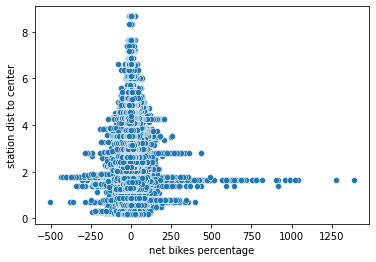

In [ ]:
sns.scatterplot(x=tripdataagg['net bikes percentage'], y=tripdataagg['station dist to center'])

In [ ]:
tripdataagg.head(3)

,start date,Name,Total docks,net bikes EOD,net bikes percentage,Latitude,Longitude,station dist to center,day of week,month
0,2018-01-01,Ames St at Main St,19,19,0.000000,42.3625,-71.08822,1.655844,Monday,January
1,2018-01-02,Ames St at Main St,19,22,15.789474,42.3625,-71.08822,1.655844,Tuesday,January
2,2018-01-03,Ames St at Main St,19,16,-15.789474,42.3625,-71.08822,1.655844,Wednesday,January


In [ ]:
tripdataagg = tripdataagg.drop(['Latitude', 'Longitude'], axis=1)
tripdataagg

,start date,Name,Total docks,net bikes EOD,net bikes percentage,station dist to center,day of week,month
0,2018-01-01,Ames St at Main St,19,19,0.000000,1.655844,Monday,January
1,2018-01-02,Ames St at Main St,19,22,15.789474,1.655844,Tuesday,January
2,2018-01-03,Ames St at Main St,19,16,-15.789474,1.655844,Wednesday,January
3,2018-01-06,Ames St at Main St,19,19,0.000000,1.655844,Saturday,January
4,2018-01-07,Ames St at Main St,19,20,5.263158,1.655844,Sunday,January
...,...,...,...,...,...,...,...,...
216864,2020-11-21,Harvard Stadium: N. Harvard St at Soldiers Fie...,15,18,20.000000,3.533452,Saturday,November
216865,2020-11-22,Harvard Stadium: N. Harvard St at Soldiers Fie...,15,17,13.333333,3.533452,Sunday,November
216866,2020-11-25,Harvard Stadium: N. Harvard St at Soldiers Fie...,15,15,0.000000,3.533452,Wednesday,November
216867,2020-11-27,Harvard Stadium: N. Harvard St at Soldiers Fie...,15,16,6.666667,3.533452,Friday,November


In [ ]:
#tripduration average
tripdatadur = tripdata.groupby(by=['start station name', 'start day of week']).agg({'tripduration':['mean']}).reset_index()
tripdatadur.columns = ['station name', 'day of week', 'trip duration mean']
tripdatadur

,station name,day of week,trip duration mean
0,175 N Harvard St,Friday,17.596503
1,175 N Harvard St,Monday,16.514557
2,175 N Harvard St,Saturday,22.096111
3,175 N Harvard St,Sunday,21.683891
4,175 N Harvard St,Thursday,16.550015
...,...,...,...
3249,Yawkey Way at Boylston St.,Saturday,22.188923
3250,Yawkey Way at Boylston St.,Sunday,16.587013
3251,Yawkey Way at Boylston St.,Thursday,14.466817
3252,Yawkey Way at Boylston St.,Tuesday,12.704583


In [ ]:
#gender agg dataframe
tripdatagend = tripdata[['start station name', 'start day of week', 'gender']]
tripdatagend

,start station name,start day of week,gender
0,MIT Pacific St at Purrington St,Monday,2.0
1,Union Square - Somerville,Monday,1.0
2,Back Bay T Stop - Dartmouth St at Stuart St,Monday,1.0
3,Coolidge Corner - Beacon St @ Centre St,Monday,1.0
4,Tremont St at E Berkeley St,Monday,1.0
...,...,...,...
6290018,Commonwealth Ave At Babcock St,Thursday,0.0
6290019,Spaulding Rehabilitation Hospital - Charlestow...,Thursday,1.0
6290020,Nashua Street at Red Auerbach Way,Thursday,1.0
6290021,MIT Pacific St at Purrington St,Thursday,1.0


In [ ]:
len(tripdata['start station name'].unique())

472

In [ ]:
tripdatagend['st_day_count'] = tripdatagend.groupby(['start station name', 'start day of week']).transform(len)
tripdatagend

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,start station name,start day of week,gender,st_day_count
0,MIT Pacific St at Purrington St,Monday,2.0,12126
1,Union Square - Somerville,Monday,1.0,3551
2,Back Bay T Stop - Dartmouth St at Stuart St,Monday,1.0,8903
3,Coolidge Corner - Beacon St @ Centre St,Monday,1.0,256
4,Tremont St at E Berkeley St,Monday,1.0,3831
...,...,...,...,...
6290018,Commonwealth Ave At Babcock St,Thursday,0.0,3689
6290019,Spaulding Rehabilitation Hospital - Charlestow...,Thursday,1.0,3105
6290020,Nashua Street at Red Auerbach Way,Thursday,1.0,14073
6290021,MIT Pacific St at Purrington St,Thursday,1.0,13006


In [ ]:
tripdatagend['st_day_gend_count'] = tripdatagend.groupby(['start station name', 'start day of week', 'gender']).transform(len)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tripdatagend['gender perc'] = tripdatagend['st_day_gend_count']/tripdatagend['st_day_count']
tripdatagend

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,start station name,start day of week,gender,st_day_count,st_day_gend_count,gender perc
0,MIT Pacific St at Purrington St,Monday,2.0,12126,2104,0.173511
1,Union Square - Somerville,Monday,1.0,3551,1889,0.531963
2,Back Bay T Stop - Dartmouth St at Stuart St,Monday,1.0,8903,6248,0.701786
3,Coolidge Corner - Beacon St @ Centre St,Monday,1.0,256,186,0.726562
4,Tremont St at E Berkeley St,Monday,1.0,3831,2123,0.554163
...,...,...,...,...,...,...
6290018,Commonwealth Ave At Babcock St,Thursday,0.0,3689,1297,0.351586
6290019,Spaulding Rehabilitation Hospital - Charlestow...,Thursday,1.0,3105,1301,0.419002
6290020,Nashua Street at Red Auerbach Way,Thursday,1.0,14073,9705,0.689618
6290021,MIT Pacific St at Purrington St,Thursday,1.0,13006,8318,0.639551


In [ ]:
gend_pivot = tripdatagend.pivot_table(index=['start station name', 'start day of week'], columns='gender', values='gender perc').reset_index().fillna(0)
gend_pivot

gender,start station name,start day of week,0.0,1.0,2.0
0,175 N Harvard St,Friday,0.363252,0.455679,0.181069
1,175 N Harvard St,Monday,0.331758,0.464064,0.204178
2,175 N Harvard St,Saturday,0.459583,0.374928,0.165488
3,175 N Harvard St,Sunday,0.438462,0.399168,0.162370
4,175 N Harvard St,Thursday,0.330035,0.462831,0.207135
...,...,...,...,...,...
3249,Yawkey Way at Boylston St.,Saturday,0.359756,0.457317,0.182927
3250,Yawkey Way at Boylston St.,Sunday,0.259740,0.532468,0.207792
3251,Yawkey Way at Boylston St.,Thursday,0.072072,0.738739,0.189189
3252,Yawkey Way at Boylston St.,Tuesday,0.058333,0.716667,0.225000


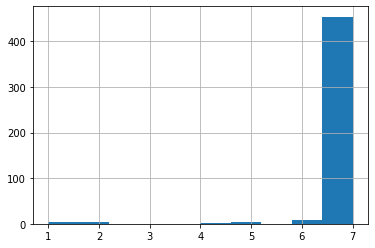

In [ ]:
gend_pivot['start station name'].value_counts().hist()

In [ ]:
#same for generation
tripdatagen = tripdata[['start station name', 'start day of week', 'generation']]
tripdatagen['st_day_count'] = tripdatagen.groupby(['start station name', 'start day of week']).transform(len)
tripdatagen['st_day_gen_count'] = tripdatagen.groupby(['start station name', 'start day of week', 'generation']).transform(len)
tripdatagen['generation perc'] = tripdatagen['st_day_gen_count']/tripdatagen['st_day_count']
generation_pivot = tripdatagen.pivot_table(index=['start station name', 'start day of week'], columns='generation', values='generation perc').reset_index().fillna(0)
generation_pivot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

generation,start station name,start day of week,Baby Boomers,Gen X,Gen Z,Millennials,Silent Generation,Unknown
0,175 N Harvard St,Friday,0.022940,0.188196,0.059911,0.465033,0.002450,0.261470
1,175 N Harvard St,Monday,0.027605,0.175578,0.057946,0.482964,0.000497,0.255409
2,175 N Harvard St,Saturday,0.016052,0.202561,0.048729,0.414103,0.002675,0.315880
3,175 N Harvard St,Sunday,0.015800,0.187110,0.060707,0.431601,0.001040,0.303742
4,175 N Harvard St,Thursday,0.040276,0.188262,0.053395,0.469505,0.001151,0.247411
...,...,...,...,...,...,...,...,...
3249,Yawkey Way at Boylston St.,Saturday,0.067073,0.414634,0.091463,0.426829,0.000000,0.000000
3250,Yawkey Way at Boylston St.,Sunday,0.077922,0.311688,0.064935,0.545455,0.000000,0.000000
3251,Yawkey Way at Boylston St.,Thursday,0.099099,0.234234,0.099099,0.567568,0.000000,0.000000
3252,Yawkey Way at Boylston St.,Tuesday,0.233333,0.216667,0.050000,0.500000,0.000000,0.000000


In [ ]:
#same for usertype
tripdatau = tripdata[['start station name', 'start day of week', 'usertype']]
tripdatau['st_day_count'] = tripdatau.groupby(['start station name', 'start day of week']).transform(len)
tripdatau['st_day_u_count'] = tripdatau.groupby(['start station name', 'start day of week', 'usertype']).transform(len)
tripdatau['usertype perc'] = tripdatau['st_day_u_count']/tripdatau['st_day_count']
usertype_pivot = tripdatau.pivot_table(index=['start station name', 'start day of week'], columns='usertype', values='usertype perc').reset_index().fillna(0)
usertype_pivot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

usertype,start station name,start day of week,Customer,Subscriber
0,175 N Harvard St,Friday,0.247661,0.752339
1,175 N Harvard St,Monday,0.200696,0.799304
2,175 N Harvard St,Saturday,0.362698,0.637302
3,175 N Harvard St,Sunday,0.356965,0.643035
4,175 N Harvard St,Thursday,0.209666,0.790334
...,...,...,...,...
3249,Yawkey Way at Boylston St.,Saturday,0.347561,0.652439
3250,Yawkey Way at Boylston St.,Sunday,0.246753,0.753247
3251,Yawkey Way at Boylston St.,Thursday,0.063063,0.936937
3252,Yawkey Way at Boylston St.,Tuesday,0.058333,0.941667


In [ ]:
gend_pivot

gender,start station name,start day of week,0.0,1.0,2.0
0,175 N Harvard St,Friday,0.363252,0.455679,0.181069
1,175 N Harvard St,Monday,0.331758,0.464064,0.204178
2,175 N Harvard St,Saturday,0.459583,0.374928,0.165488
3,175 N Harvard St,Sunday,0.438462,0.399168,0.162370
4,175 N Harvard St,Thursday,0.330035,0.462831,0.207135
...,...,...,...,...,...
3249,Yawkey Way at Boylston St.,Saturday,0.359756,0.457317,0.182927
3250,Yawkey Way at Boylston St.,Sunday,0.259740,0.532468,0.207792
3251,Yawkey Way at Boylston St.,Thursday,0.072072,0.738739,0.189189
3252,Yawkey Way at Boylston St.,Tuesday,0.058333,0.716667,0.225000


In [ ]:
model_df = tripdataagg[['net bikes percentage', 'start date', 'month', 'day of week', 'Name', 'station dist to center']]
model_df = model_df.merge(gend_pivot, left_on=['day of week', 'Name'], right_on=['start day of week', 'start station name'], how='left')
model_df = model_df.merge(generation_pivot, left_on=['day of week', 'Name'], right_on=['start day of week', 'start station name'], how='left')
model_df = model_df.merge(usertype_pivot, left_on=['day of week', 'Name'], right_on=['start day of week', 'start station name'], how='left')
model_df.head(3)

,net bikes percentage,start date,month,day of week,Name,station dist to center,start station name_x,start day of week_x,0.0,1.0,2.0,start station name_y,start day of week_y,Baby Boomers,Gen X,Gen Z,Millennials,Silent Generation,Unknown,start station name,start day of week,Customer,Subscriber
0,0.000000,2018-01-01,January,Monday,Ames St at Main St,1.655844,Ames St at Main St,Monday,0.224815,0.573416,0.201768,Ames St at Main St,Monday,0.051022,0.146108,0.083780,0.525076,0.001087,0.192927,Ames St at Main St,Monday,0.067256,0.932744
1,15.789474,2018-01-02,January,Tuesday,Ames St at Main St,1.655844,Ames St at Main St,Tuesday,0.209336,0.584041,0.206623,Ames St at Main St,Tuesday,0.055456,0.148098,0.085362,0.529798,0.001285,0.180001,Ames St at Main St,Tuesday,0.063307,0.936693
2,-15.789474,2018-01-03,January,Wednesday,Ames St at Main St,1.655844,Ames St at Main St,Wednesday,0.200691,0.595088,0.204221,Ames St at Main St,Wednesday,0.054273,0.144286,0.086851,0.545227,0.001544,0.167819,Ames St at Main St,Wednesday,0.071702,0.928298


In [ ]:
#add in District
district_df = station_info[['Name', 'District']]
district_df

,Name,District
0,175 N Harvard St,Boston
1,191 Beacon St,Somerville
2,2 Hummingbird Lane at Olmsted Green,Boston
3,30 Dane St,Somerville
4,359 Broadway - Broadway at Fayette Street,Cambridge
...,...,...
358,West Newton,Newton
359,West Newton Armory,Newton
361,Whittier St Health Center,Boston
362,Williams St at Washington St,Boston


In [ ]:
district_dict = district_df.set_index('Name')['District'].to_dict()
district_dict

{'175 N Harvard St': 'Boston',
 '191 Beacon St': 'Somerville',
 '2 Hummingbird Lane at Olmsted Green': 'Boston',
 '30 Dane St': 'Somerville',
 '359 Broadway - Broadway at Fayette Street': 'Cambridge',
 '645 Summer St': 'Boston',
 '699 Mt Auburn St': 'Cambridge',
 '7 Acre Park': 'Everett',
 '700 Commonwealth Ave.': 'Boston',
 '700 Huron Ave': 'Cambridge',
 '75 Binney St': 'Cambridge',
 '84 Cambridgepark Dr': 'Cambridge',
 'Airport T Stop - Bremen St at Brooks St': 'Boston',
 'Albany St at E. Brookline St': 'Boston',
 'Alewife MBTA at Steel Place': 'Cambridge',
 'Alewife Station at Russell Field': 'Cambridge',
 'American Legion Hwy at Canterbury St': 'Boston',
 'Ames St at Broadway': 'Cambridge',
 'Ames St at Main St': 'Cambridge',
 'Aquarium T Stop - 200 Atlantic Ave': 'Boston',
 'Arsenal Yards': 'Watertown',
 'Ashmont T Stop': 'Boston',
 'Assembly Square T': 'Somerville',
 'B.U. Central - 725 Comm. Ave.': 'Boston',
 'Back Bay T Stop - Dartmouth St at Stuart St': 'Boston',
 'Bacon St at

In [ ]:
model_df['district'] = model_df['start station name'].map(district_dict)
model_df

,net bikes percentage,start date,month,day of week,Name,station dist to center,start station name_x,start day of week_x,0.0,1.0,2.0,start station name_y,start day of week_y,Baby Boomers,Gen X,Gen Z,Millennials,Silent Generation,Unknown,start station name,start day of week,Customer,Subscriber,district
0,0.000000,2018-01-01,January,Monday,Ames St at Main St,1.655844,Ames St at Main St,Monday,0.224815,0.573416,0.201768,Ames St at Main St,Monday,0.051022,0.146108,0.083780,0.525076,0.001087,0.192927,Ames St at Main St,Monday,0.067256,0.932744,Cambridge
1,15.789474,2018-01-02,January,Tuesday,Ames St at Main St,1.655844,Ames St at Main St,Tuesday,0.209336,0.584041,0.206623,Ames St at Main St,Tuesday,0.055456,0.148098,0.085362,0.529798,0.001285,0.180001,Ames St at Main St,Tuesday,0.063307,0.936693,Cambridge
2,-15.789474,2018-01-03,January,Wednesday,Ames St at Main St,1.655844,Ames St at Main St,Wednesday,0.200691,0.595088,0.204221,Ames St at Main St,Wednesday,0.054273,0.144286,0.086851,0.545227,0.001544,0.167819,Ames St at Main St,Wednesday,0.071702,0.928298,Cambridge
3,0.000000,2018-01-06,January,Saturday,Ames St at Main St,1.655844,Ames St at Main St,Saturday,0.289625,0.528949,0.181425,Ames St at Main St,Saturday,0.017422,0.136495,0.096411,0.554755,0.001834,0.193084,Ames St at Main St,Saturday,0.200943,0.799057,Cambridge
4,5.263158,2018-01-07,January,Sunday,Ames St at Main St,1.655844,Ames St at Main St,Sunday,0.288506,0.535177,0.176317,Ames St at Main St,Sunday,0.019977,0.127389,0.099016,0.546902,0.000000,0.206717,Ames St at Main St,Sunday,0.181384,0.818616,Cambridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216864,20.000000,2020-11-21,November,Saturday,Harvard Stadium: N. Harvard St at Soldiers Fie...,3.533452,Harvard Stadium: N. Harvard St at Soldiers Fie...,Saturday,1.000000,0.000000,0.000000,Harvard Stadium: N. Harvard St at Soldiers Fie...,Saturday,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,Harvard Stadium: N. Harvard St at Soldiers Fie...,Saturday,0.750000,0.250000,Boston
216865,13.333333,2020-11-22,November,Sunday,Harvard Stadium: N. Harvard St at Soldiers Fie...,3.533452,Harvard Stadium: N. Harvard St at Soldiers Fie...,Sunday,1.000000,0.000000,0.000000,Harvard Stadium: N. Harvard St at Soldiers Fie...,Sunday,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,Harvard Stadium: N. Harvard St at Soldiers Fie...,Sunday,0.166667,0.833333,Boston
216866,0.000000,2020-11-25,November,Wednesday,Harvard Stadium: N. Harvard St at Soldiers Fie...,3.533452,Harvard Stadium: N. Harvard St at Soldiers Fie...,Wednesday,1.000000,0.000000,0.000000,Harvard Stadium: N. Harvard St at Soldiers Fie...,Wednesday,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,Harvard Stadium: N. Harvard St at Soldiers Fie...,Wednesday,0.000000,1.000000,Boston
216867,6.666667,2020-11-27,November,Friday,Harvard Stadium: N. Harvard St at Soldiers Fie...,3.533452,Harvard Stadium: N. Harvard St at Soldiers Fie...,Friday,1.000000,0.000000,0.000000,Harvard Stadium: N. Harvard St at Soldiers Fie...,Friday,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,Harvard Stadium: N. Harvard St at Soldiers Fie...,Friday,0.181818,0.818182,Boston


In [ ]:
model_df = model_df[['net bikes percentage', 'start date', 'day of week', 'month', 'start station name', 'station dist to center', 'district', 2.0, 1.0, 0.0, 'Customer', 'Subscriber', 'Gen Z', 'Millennials', 'Gen X', 'Baby Boomers', 'Silent Generation', 'Unknown']]
model_df.head(3)

,net bikes percentage,start date,day of week,month,start station name,station dist to center,district,2.0,1.0,0.0,Customer,Subscriber,Gen Z,Millennials,Gen X,Baby Boomers,Silent Generation,Unknown
0,0.000000,2018-01-01,Monday,January,Ames St at Main St,1.655844,Cambridge,0.201768,0.573416,0.224815,0.067256,0.932744,0.083780,0.525076,0.146108,0.051022,0.001087,0.192927
1,15.789474,2018-01-02,Tuesday,January,Ames St at Main St,1.655844,Cambridge,0.206623,0.584041,0.209336,0.063307,0.936693,0.085362,0.529798,0.148098,0.055456,0.001285,0.180001
2,-15.789474,2018-01-03,Wednesday,January,Ames St at Main St,1.655844,Cambridge,0.204221,0.595088,0.200691,0.071702,0.928298,0.086851,0.545227,0.144286,0.054273,0.001544,0.167819


In [ ]:
model_df.columns = ['net_bikes_percentage', 'start_date', 'day_of_week', 'month', 'station_name', 'st_dist_to_center', 'district', 'female', 'male', 'unk_gender', 'customer', 'subscriber', 'gen_z', 'millennial', 'gen_x', 'baby_boomer', 'silent_gen', 'unk_generation']

In [ ]:
model_df

,net_bikes_percentage,start_date,day_of_week,month,station_name,st_dist_to_center,district,female,male,unk_gender,customer,subscriber,gen_z,millennial,gen_x,baby_boomer,silent_gen,unk_generation
0,0.000000,2018-01-01,Monday,January,Ames St at Main St,1.655844,Cambridge,0.201768,0.573416,0.224815,0.067256,0.932744,0.083780,0.525076,0.146108,0.051022,0.001087,0.192927
1,15.789474,2018-01-02,Tuesday,January,Ames St at Main St,1.655844,Cambridge,0.206623,0.584041,0.209336,0.063307,0.936693,0.085362,0.529798,0.148098,0.055456,0.001285,0.180001
2,-15.789474,2018-01-03,Wednesday,January,Ames St at Main St,1.655844,Cambridge,0.204221,0.595088,0.200691,0.071702,0.928298,0.086851,0.545227,0.144286,0.054273,0.001544,0.167819
3,0.000000,2018-01-06,Saturday,January,Ames St at Main St,1.655844,Cambridge,0.181425,0.528949,0.289625,0.200943,0.799057,0.096411,0.554755,0.136495,0.017422,0.001834,0.193084
4,5.263158,2018-01-07,Sunday,January,Ames St at Main St,1.655844,Cambridge,0.176317,0.535177,0.288506,0.181384,0.818616,0.099016,0.546902,0.127389,0.019977,0.000000,0.206717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216864,20.000000,2020-11-21,Saturday,November,Harvard Stadium: N. Harvard St at Soldiers Fie...,3.533452,Boston,0.000000,0.000000,1.000000,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
216865,13.333333,2020-11-22,Sunday,November,Harvard Stadium: N. Harvard St at Soldiers Fie...,3.533452,Boston,0.000000,0.000000,1.000000,0.166667,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
216866,0.000000,2020-11-25,Wednesday,November,Harvard Stadium: N. Harvard St at Soldiers Fie...,3.533452,Boston,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
216867,6.666667,2020-11-27,Friday,November,Harvard Stadium: N. Harvard St at Soldiers Fie...,3.533452,Boston,0.000000,0.000000,1.000000,0.181818,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
model_df.to_csv('model_df.csv') 
files.download('model_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tripdata.head()

,tripduration,starttime,stoptime,start station name,end station name,usertype,birth year,gender,generation,start day of week,end day of week,start date,end date
0,6.466667,2018-01-01 00:16:33,2018-01-01 00:23:01,MIT Pacific St at Purrington St,Ames St at Main St,Subscriber,1992.0,2.0,Millennials,Monday,Monday,2018-01-01,2018-01-01
1,4.416667,2018-01-01 00:42:00,2018-01-01 00:46:25,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,Subscriber,1990.0,1.0,Millennials,Monday,Monday,2018-01-01,2018-01-01
2,19.450000,2018-01-01 00:42:44,2018-01-01 01:02:11,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,Subscriber,1990.0,1.0,Millennials,Monday,Monday,2018-01-01,2018-01-01
3,14.250000,2018-01-01 00:56:50,2018-01-01 01:11:06,Coolidge Corner - Beacon St @ Centre St,University Park,Subscriber,1992.0,1.0,Millennials,Monday,Monday,2018-01-01,2018-01-01
4,8.116667,2018-01-01 01:07:54,2018-01-01 01:16:02,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,Subscriber,1993.0,1.0,Millennials,Monday,Monday,2018-01-01,2018-01-01
